<a href="https://colab.research.google.com/github/nikitha-moorthi/Comparison-of-ML-Classification-Algorithms/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/phase2/tot_dataset/tot_dataset

test  train


In [ ]:
#Class to load the dataset images from drivce
import os
import cv2
import numpy as np


class SimpleDatasetLoader:
    # Method: Constructor
    def __init__(self, preprocessors=None):
        """
        :param preprocessors: List of image preprocessors
        """
        self.preprocessors = preprocessors

        if self.preprocessors is None:
            self.preprocessors = []

    # Method: Used to load a list of images for pre-processing
    def load(self, image_paths, verbose=-1):
        """
        :param image_paths: List of image paths
        :param verbose: Parameter for printing information to console
        :return: Tuple of data and labels
        """
        data, labels = [], []

        for i, image_path in enumerate(image_paths):
            image = cv2.imread(image_path)
            label = image_path.split(os.path.sep)[-2]

            if self.preprocessors is not None:
                for p in self.preprocessors:
                    image = p.preprocess(image)

            data.append(image)
            labels.append(label)

            if verbose > 0 and i > 0 and (i+1) % verbose == 0:
                print('[INFO]: Processed {}/{}'.format(i+1, len(image_paths)))

        return (np.array(data), np.array(labels))

In [ ]:
#Class Preprocessror 
class SimplePreprocessor:
    # Method: Constructor
    def __init__(self, width, height, interpolation=cv2.INTER_AREA):
        """
        :param width: Image width
        :param height: Image height
        :param interpolation: Interpolation algorithm
        """
        self.width = width
        self.height = height
        self.interpolation = interpolation

    # Method: Used to resize the image to a fixed size (ignoring the aspect ratio)
    def preprocess(self, image):
        """
        :param image: Image
        :return: Re-sized image
        """
        return cv2.resize(image, (self.width, self.height), interpolation=self.interpolation)

In [ ]:
from imutils import paths
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from __main__ import SimplePreprocessor
from __main__ import SimpleDatasetLoader




# Get list of image paths
image_paths = list(paths.list_images("/content/drive/MyDrive/phase2/tot_dataset/tot_dataset/train"))

# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
sp = SimplePreprocessor(32, 32)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(image_paths, verbose=500)

# Reshape from (4676, 32, 32, 3) to (4676, 32*32*3=3072)
data = data.reshape((data.shape[0], 3072))

# Print information about memory consumption
print('[INFO]: Features Matrix: {:.1f}MB'.format(float(data.nbytes / 1024*1000.0)))

# Encode labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# Split data into training (75%) and testing (25%) data
(x_train, x_test,y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)
# Train and evaluate the classifier on the raw pixel intensities
print('[INFO]: Classification starting....')
model=GaussianNB()

model.fit(x_train, y_train)
y_pred_dtc=model.predict(x_test)
y_pred_dtc

[INFO]: Images loading....
[INFO]: Processed 500/4676
[INFO]: Processed 1000/4676
[INFO]: Processed 1500/4676
[INFO]: Processed 2000/4676
[INFO]: Processed 2500/4676
[INFO]: Processed 3000/4676
[INFO]: Processed 3500/4676
[INFO]: Processed 4000/4676
[INFO]: Processed 4500/4676
[INFO]: Features Matrix: 14028000.0MB
[INFO]: Classification starting....


array([4, 4, 3, ..., 1, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       217
           1       0.66      0.83      0.73       144
           2       0.72      0.82      0.77       207
           3       0.98      1.00      0.99       185
           4       0.77      0.64      0.70       207
           5       0.68      0.67      0.67       209

    accuracy                           0.79      1169
   macro avg       0.80      0.80      0.79      1169
weighted avg       0.80      0.79      0.79      1169



In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#pred_y = model.predict(test_x)
a = confusion_matrix(y_pred_dtc,y_test)
print(a)

[[182   4   3   0  11  17]
 [  1 120  12   3   0   8]
 [  0  27 170   0   3   7]
 [  0   0   0 185   0   0]
 [  0  25  17   0 132  33]
 [  4   7  34   0  25 139]]


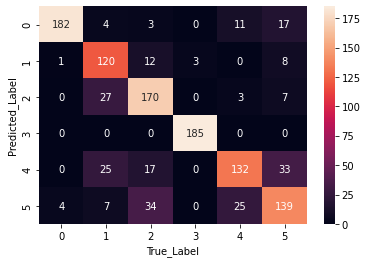

In [ ]:
depth= []
comp = []
sc = []
for i in range(len(a)):
    for j in range(len(a[i])):
      depth.append(i)
      comp.append(j)
      sc.append(a[j][i])
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
df_d = pd.DataFrame()
df_d['True_Label']=depth
df_d['Predicted_Label']=comp
df_d['Scores']= sc
data_pivoted = df_d.pivot( "Predicted_Label","True_Label", "Scores")
ax = sns.heatmap(data_pivoted,annot=True,fmt="d")
plt.show()